In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from torch import optim

In [3]:
words=open('names.txt','r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
def generate_bigrams(words):
    # create the training set of bigrams (x,y)
    xs, ys = [], []
    chars = sorted(list(set(''.join(words))))
    stoi = {s:i+1 for i,s in enumerate(chars)}
    stoi['.'] = 0
    itos = {i:s for s,i in stoi.items()}
    for w in words:
      chs = ['.'] + list(w) + ['.']
      for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

    xs = torch.tensor(xs)
    ys = torch.tensor(ys)
    return xs, ys

def generate_trigrams(words):
    # create the training set of trigrams ((x1,x2),y)
    xs, ys = [], []
    chars = sorted(list(set(''.join(words))))
    stoi = {s:i+1 for i,s in enumerate(chars)}
    stoi['.'] = 0
    itos = {i:s for s,i in stoi.items()}
    for w in words:
      chs = ['.'] + list(w) + ['.']
      for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]+27
        ix3 = stoi[ch3]
        xs.append((ix1,ix2))
        ys.append(ix3)

    xs = torch.tensor(xs)
    ys = torch.tensor(ys)
    return xs, ys

trigram_xs, trigram_ys=generate_trigrams(words)
bigram_xs, bigram_ys=generate_bigrams(words)
print(trigram_xs)

tensor([[ 0, 32],
        [ 5, 40],
        [13, 40],
        ...,
        [26, 52],
        [25, 53],
        [26, 51]])


Epoch [10/1000], Loss: 3.0967
Epoch [20/1000], Loss: 2.6427
Epoch [30/1000], Loss: 2.4697
Epoch [40/1000], Loss: 2.3828
Epoch [50/1000], Loss: 2.3451
Epoch [60/1000], Loss: 2.3208
Epoch [70/1000], Loss: 2.3058
Epoch [80/1000], Loss: 2.2955
Epoch [90/1000], Loss: 2.2878
Epoch [100/1000], Loss: 2.2819
Epoch [110/1000], Loss: 2.2772
Epoch [120/1000], Loss: 2.2734
Epoch [130/1000], Loss: 2.2702
Epoch [140/1000], Loss: 2.2675
Epoch [150/1000], Loss: 2.2652
Epoch [160/1000], Loss: 2.2632
Epoch [170/1000], Loss: 2.2615
Epoch [180/1000], Loss: 2.2600
Epoch [190/1000], Loss: 2.2586
Epoch [200/1000], Loss: 2.2574
Epoch [210/1000], Loss: 2.2563
Epoch [220/1000], Loss: 2.2553
Epoch [230/1000], Loss: 2.2544
Epoch [240/1000], Loss: 2.2536
Epoch [250/1000], Loss: 2.2528
Epoch [260/1000], Loss: 2.2521
Epoch [270/1000], Loss: 2.2514
Epoch [280/1000], Loss: 2.2508
Epoch [290/1000], Loss: 2.2503
Epoch [300/1000], Loss: 2.2498
Epoch [310/1000], Loss: 2.2493
Epoch [320/1000], Loss: 2.2488
Epoch [330/1000],

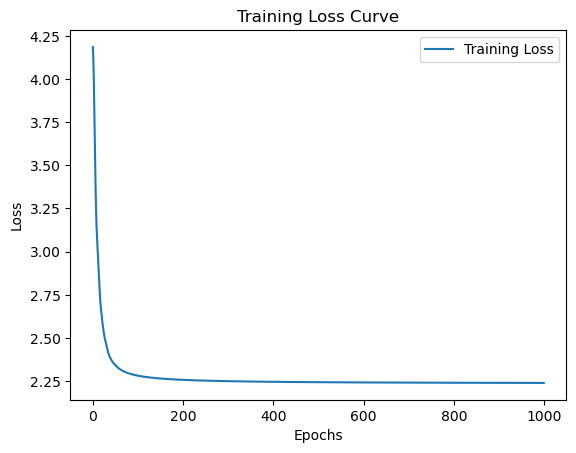

In [49]:
class TrigramModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.W=nn.Parameter(torch.randn((54,27)))
        
    def forward(self, x):
        return self.W[x].sum(dim=0)
    
model=TrigramModel().cuda()
optimizer = optim.SGD(model.parameters(), lr=3.0, momentum=0.9)
loss_function = nn.CrossEntropyLoss()

# Training loop
num_epochs = 1000
losses = []  # To store loss values for plotting

for epoch in range(num_epochs):
    # Forward pass
    optimizer.zero_grad()
    pred = model(trigram_xs.T.cuda())
    l = loss_function(pred, trigram_ys.cuda())
    
    # Backward pass
    l.backward()
    optimizer.step()
    
    # Record loss
    losses.append(l.item())
    
    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {l.item():.4f}')

# Plot the loss curve
plt.plot(losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

In [35]:
pred = model(trigram_xs.T)
pred.shape

torch.Size([196113, 27])

Epoch [10/1000], Loss: 3.1697
Epoch [20/1000], Loss: 2.7661
Epoch [30/1000], Loss: 2.6351
Epoch [40/1000], Loss: 2.5698
Epoch [50/1000], Loss: 2.5380
Epoch [60/1000], Loss: 2.5196
Epoch [70/1000], Loss: 2.5082
Epoch [80/1000], Loss: 2.5004
Epoch [90/1000], Loss: 2.4945
Epoch [100/1000], Loss: 2.4899
Epoch [110/1000], Loss: 2.4861
Epoch [120/1000], Loss: 2.4829
Epoch [130/1000], Loss: 2.4803
Epoch [140/1000], Loss: 2.4780
Epoch [150/1000], Loss: 2.4761
Epoch [160/1000], Loss: 2.4744
Epoch [170/1000], Loss: 2.4730
Epoch [180/1000], Loss: 2.4717
Epoch [190/1000], Loss: 2.4706
Epoch [200/1000], Loss: 2.4696
Epoch [210/1000], Loss: 2.4688
Epoch [220/1000], Loss: 2.4680
Epoch [230/1000], Loss: 2.4673
Epoch [240/1000], Loss: 2.4666
Epoch [250/1000], Loss: 2.4660
Epoch [260/1000], Loss: 2.4655
Epoch [270/1000], Loss: 2.4650
Epoch [280/1000], Loss: 2.4645
Epoch [290/1000], Loss: 2.4641
Epoch [300/1000], Loss: 2.4637
Epoch [310/1000], Loss: 2.4634
Epoch [320/1000], Loss: 2.4631
Epoch [330/1000],

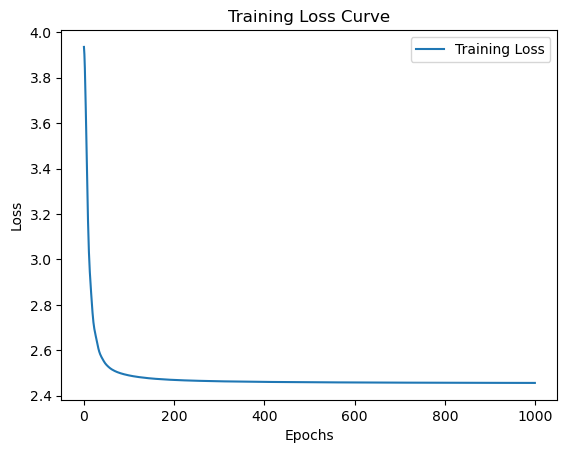

In [52]:
class BigramModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.W=nn.Parameter(torch.randn((27,27)))
        
    def forward(self, x):
        return self.W[x]
    
model=BigramModel().cuda()
optimizer = optim.SGD(model.parameters(), lr=3.0, momentum=0.9)
loss_function = nn.CrossEntropyLoss()

# Training loop
num_epochs = 1000
losses = []  # To store loss values for plotting

for epoch in range(num_epochs):
    # Forward pass
    optimizer.zero_grad()
    pred = model(bigram_xs.cuda())
    l = loss_function(pred, bigram_ys.cuda())
    
    # Backward pass
    l.backward()
    optimizer.step()
    
    # Record loss
    losses.append(l.item())
    
    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {l.item():.4f}')

# Plot the loss curve
plt.plot(losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

In [88]:
#80% Train, 10% Dev, 10% Test
print(trigram_xs.shape)
print(bigram_xs.shape)
rand_perm_bigram=torch.randperm(bigram_xs.size()[0])
rand_perm_trigram=torch.randperm(trigram_xs.size()[0])
print(rand_perm_bigram)
shuffled_bigram_xs=bigram_xs[rand_perm_bigram]
shuffled_trigram_xs=trigram_xs[rand_perm_trigram]
shuffled_bigram_ys=bigram_ys[rand_perm_bigram]
shuffled_trigram_ys=trigram_ys[rand_perm_trigram]
bigram_train_xs=shuffled_bigram_xs[:int(0.8*bigram_xs.shape[0])]
bigram_dev_xs=shuffled_bigram_xs[int(0.8*bigram_xs.shape[0]):int(0.8*bigram_xs.shape[0])+int(0.1*bigram_xs.shape[0])]
bigram_test_xs=shuffled_bigram_xs[int(0.8*bigram_xs.shape[0])+int(0.1*bigram_xs.shape[0]):]
bigram_train_ys=shuffled_bigram_ys[:int(0.8*bigram_xs.shape[0])]
bigram_dev_ys=shuffled_bigram_ys[int(0.8*bigram_xs.shape[0]):int(0.8*bigram_xs.shape[0])+int(0.1*bigram_xs.shape[0])]
bigram_test_ys=shuffled_bigram_ys[int(0.8*bigram_xs.shape[0])+int(0.1*bigram_xs.shape[0]):]
trigram_train_xs=shuffled_trigram_xs[:int(0.8*trigram_xs.shape[0])]
trigram_dev_xs=shuffled_trigram_xs[int(0.8*trigram_xs.shape[0]):int(0.8*trigram_xs.shape[0])+int(0.1*trigram_xs.shape[0])]
trigram_test_xs=shuffled_trigram_xs[int(0.8*trigram_xs.shape[0])+int(0.1*trigram_xs.shape[0]):]
trigram_train_ys=shuffled_trigram_ys[:int(0.8*trigram_xs.shape[0])]
trigram_dev_ys=shuffled_trigram_ys[int(0.8*trigram_xs.shape[0]):int(0.8*trigram_xs.shape[0])+int(0.1*trigram_xs.shape[0])]
trigram_test_ys=shuffled_trigram_ys[int(0.8*trigram_xs.shape[0])+int(0.1*trigram_xs.shape[0]):]

torch.Size([196113, 2])
torch.Size([228146])
tensor([ 40558, 223760, 149612,  ..., 143529,  20496,  72497])


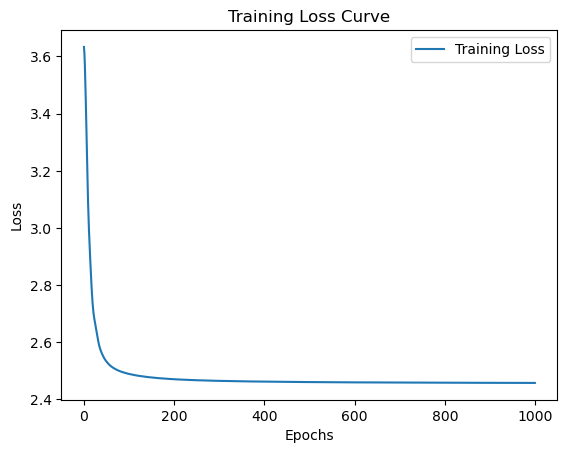

In [89]:
model=BigramModel().cuda()
optimizer = optim.SGD(model.parameters(), lr=3.0, momentum=0.9)
loss_function = nn.CrossEntropyLoss()

# Training loop
num_epochs = 1000
losses = []  # To store loss values for plotting

for epoch in range(num_epochs):
    # Forward pass
    optimizer.zero_grad()
    pred = model(bigram_train_xs.cuda())
    l = loss_function(pred, bigram_train_ys.cuda())
    
    # Backward pass
    l.backward()
    optimizer.step()
    
    # Record loss
    losses.append(l.item())
    
    # Print loss every 10 epochs
    #if (epoch + 1) % 10 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {l.item():.4f}')

# Plot the loss curve
plt.plot(losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

In [90]:
pred = model(bigram_train_xs.cuda())
print(pred.shape)
bigram_loss_train=loss_function(pred, bigram_train_ys.cuda())
pred = model(bigram_dev_xs.cuda())
print(pred.shape)
bigram_loss_dev=loss_function(pred, bigram_dev_ys.cuda())
pred = model(bigram_test_xs.cuda())
print(pred.shape)
bigram_loss_test=loss_function(pred, bigram_test_ys.cuda())

torch.Size([182516, 27])
torch.Size([22814, 27])
torch.Size([22816, 27])


In [92]:
bigram_loss_dev, bigram_loss_train, bigram_loss_test

(tensor(2.4441, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(2.4579, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(2.4594, device='cuda:0', grad_fn=<NllLossBackward0>))

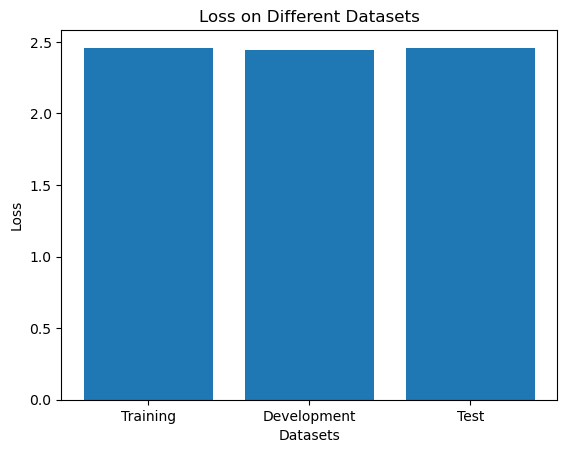

In [91]:
import matplotlib.pyplot as plt

# Calculate losses
losses = [bigram_loss_train.item(), bigram_loss_dev.item(), bigram_loss_test.item()]
labels = ['Training', 'Development', 'Test']

# Plot the bar plot
plt.bar(labels, losses)
plt.xlabel('Datasets')
plt.ylabel('Loss')
plt.title('Loss on Different Datasets')
plt.show()

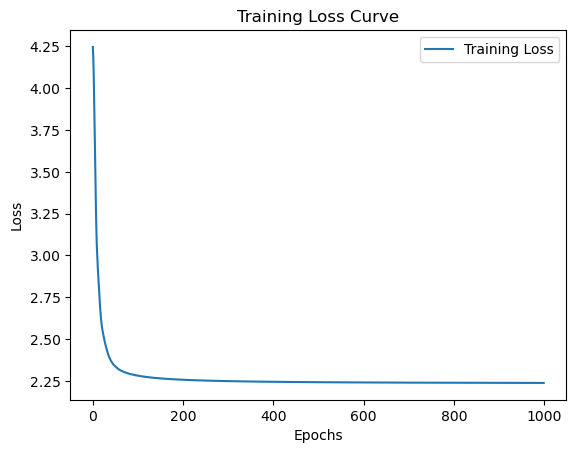

In [93]:
model=TrigramModel().cuda()
optimizer = optim.SGD(model.parameters(), lr=3.0, momentum=0.9)
loss_function = nn.CrossEntropyLoss()

# Training loop
num_epochs = 1000
losses = []  # To store loss values for plotting

for epoch in range(num_epochs):
    # Forward pass
    optimizer.zero_grad()
    pred = model(trigram_train_xs.T.cuda())
    l = loss_function(pred, trigram_train_ys.cuda())
    
    # Backward pass
    l.backward()
    optimizer.step()
    
    # Record loss
    losses.append(l.item())
    
    # Print loss every 10 epochs
    #if (epoch + 1) % 10 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {l.item():.4f}')

# Plot the loss curve
plt.plot(losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

In [94]:
pred = model(trigram_train_xs.T.cuda())
print(pred.shape)
trigram_loss_train=loss_function(pred, trigram_train_ys.cuda())
pred = model(trigram_dev_xs.T.cuda())
print(pred.shape)
trigram_loss_dev=loss_function(pred, trigram_dev_ys.cuda())
pred = model(trigram_test_xs.T.cuda())
print(pred.shape)
trigram_loss_test=loss_function(pred, trigram_test_ys.cuda())

torch.Size([156890, 27])
torch.Size([19611, 27])
torch.Size([19612, 27])


In [103]:
print(trigram_loss_test)

tensor(2.2635, device='cuda:0', grad_fn=<NllLossBackward0>)


In [83]:
trigram_xs.shape

torch.Size([196113, 2])

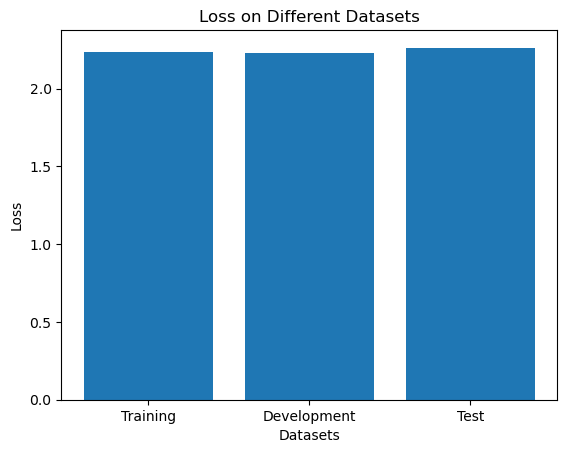

In [95]:
import matplotlib.pyplot as plt

# Calculate losses
losses = [trigram_loss_train.item(), trigram_loss_dev.item(), trigram_loss_test.item()]
labels = ['Training', 'Development', 'Test']

# Plot the bar plot
plt.bar(labels, losses)
plt.xlabel('Datasets')
plt.ylabel('Loss')
plt.title('Loss on Different Datasets')
plt.show()

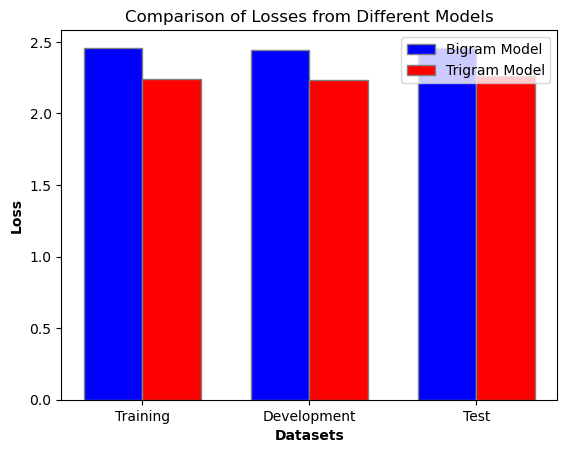

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Loss values for bigram model
bigram_losses = [bigram_loss_train.item(), bigram_loss_dev.item(), bigram_loss_test.item()]

# Loss values for trigram model
trigram_losses = [trigram_loss_train.item(), trigram_loss_dev.item(), trigram_loss_test.item()]

# Labels for datasets
labels = ['Training', 'Development', 'Test']

# Width of the bars
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]

# Plotting the bar plots
plt.bar(r1, bigram_losses, color='b', width=bar_width, edgecolor='grey', label='Bigram Model')
plt.bar(r2, trigram_losses, color='r', width=bar_width, edgecolor='grey', label='Trigram Model')

# Add labels and title
plt.xlabel('Datasets', fontweight='bold')
plt.ylabel('Loss', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
plt.title('Comparison of Losses from Different Models')

# Add legend
plt.legend()

# Show plot
plt.show()


# Tuning Weight Decay

In [97]:
regularization_parameters=[0.0001,0.001,0.01,0.1,10,100]

In [98]:
def fit_evaluate_reg_param(regularization_parameter):
    model=TrigramModel().cuda()
    optimizer = optim.SGD(model.parameters(), lr=3.0, momentum=0.9, weight_decay=regularization_parameter)
    loss_function = nn.CrossEntropyLoss()

    # Training loop
    num_epochs = 1000
    losses = []  # To store loss values for plotting

    for epoch in range(num_epochs):
        # Forward pass
        optimizer.zero_grad()
        pred = model(trigram_train_xs.T.cuda())
        l = loss_function(pred, trigram_train_ys.cuda())

        # Backward pass
        l.backward()
        optimizer.step()

        # Record loss
        losses.append(l.item())
    
    pred = model(trigram_train_xs.T.cuda())
    trigram_loss_train=loss_function(pred, trigram_train_ys.cuda())
    pred = model(trigram_dev_xs.T.cuda())
    trigram_loss_dev=loss_function(pred, trigram_dev_ys.cuda())
    
    return (trigram_loss_train, trigram_loss_dev)


In [100]:
trigram_dict={}
for r in regularization_parameters:
    losses=fit_evaluate_reg_param(r)
    trigram_dict[r]=losses
print(trigram_dict)

{0.0001: (tensor(2.2574, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(2.2487, device='cuda:0', grad_fn=<NllLossBackward0>)), 0.001: (tensor(2.3632, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(2.3519, device='cuda:0', grad_fn=<NllLossBackward0>)), 0.01: (tensor(2.7186, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(2.7087, device='cuda:0', grad_fn=<NllLossBackward0>)), 0.1: (tensor(3.1736, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(3.1714, device='cuda:0', grad_fn=<NllLossBackward0>)), 10: (tensor(nan, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(nan, device='cuda:0', grad_fn=<NllLossBackward0>)), 100: (tensor(nan, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(nan, device='cuda:0', grad_fn=<NllLossBackward0>))}


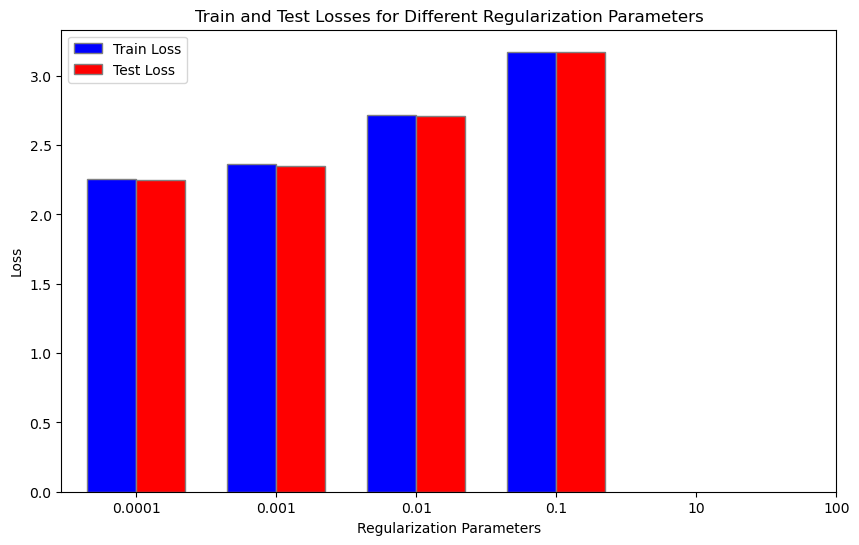

In [102]:
import matplotlib.pyplot as plt

# Assuming trigram_dict is defined as in your code

# Get regularization parameters and corresponding losses
regularization_parameters = list(trigram_dict.keys())
train_losses = [trigram_dict[r][0].item() for r in regularization_parameters]
test_losses = [trigram_dict[r][1].item() for r in regularization_parameters]

# Plotting
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Positions of bars on X-axis
r1 = range(len(regularization_parameters))
r2 = [x + bar_width for x in r1]

# Plotting train losses
plt.bar(r1, train_losses, color='b', width=bar_width, edgecolor='grey', label='Train Loss')

# Plotting test losses
plt.bar(r2, test_losses, color='r', width=bar_width, edgecolor='grey', label='Test Loss')

# Adding labels and title
plt.xlabel('Regularization Parameters')
plt.ylabel('Loss')
plt.title('Train and Test Losses for Different Regularization Parameters')
plt.xticks([r + bar_width/2 for r in r1], regularization_parameters)
plt.legend()

# Show plot
plt.show()


In [105]:
def final_model():
    model=TrigramModel().cuda()
    optimizer = optim.SGD(model.parameters(), lr=3.0, momentum=0.9, weight_decay=0.0001)
    loss_function = nn.CrossEntropyLoss()

    # Training loop
    num_epochs = 1000
    losses = []  # To store loss values for plotting

    for epoch in range(num_epochs):
        # Forward pass
        optimizer.zero_grad()
        pred = model(trigram_train_xs.T.cuda())
        l = loss_function(pred, trigram_train_ys.cuda())

        # Backward pass
        l.backward()
        optimizer.step()

        # Record loss
        losses.append(l.item())
    
    pred = model(trigram_train_xs.T.cuda())
    trigram_loss_train=loss_function(pred, trigram_train_ys.cuda())
    pred = model(trigram_dev_xs.T.cuda())
    trigram_loss_dev=loss_function(pred, trigram_dev_ys.cuda())
    pred = model(trigram_test_xs.T.cuda())
    trigram_loss_dev=loss_function(pred, trigram_test_ys.cuda())
    
    return (trigram_loss_train.item(), trigram_loss_dev.item(), trigram_loss_test.item())

final_losses=final_model()

In [106]:
final_losses

(2.2574093341827393, 2.279839277267456, 2.26352596282959)

## My own idea of what to try

Epoch [10/1000], Loss: 4.3366
Epoch [20/1000], Loss: 2.8886
Epoch [30/1000], Loss: 2.6132
Epoch [40/1000], Loss: 2.3517
Epoch [50/1000], Loss: 2.2780
Epoch [60/1000], Loss: 2.2531
Epoch [70/1000], Loss: 2.2448
Epoch [80/1000], Loss: 2.2412
Epoch [90/1000], Loss: 2.2396
Epoch [100/1000], Loss: 2.2388
Epoch [110/1000], Loss: 2.2384
Epoch [120/1000], Loss: 2.2381
Epoch [130/1000], Loss: 2.2379
Epoch [140/1000], Loss: 2.2377
Epoch [150/1000], Loss: 2.2376
Epoch [160/1000], Loss: 2.2375
Epoch [170/1000], Loss: 2.2374
Epoch [180/1000], Loss: 2.2373
Epoch [190/1000], Loss: 2.2372
Epoch [200/1000], Loss: 2.2372
Epoch [210/1000], Loss: 2.2371
Epoch [220/1000], Loss: 2.2371
Epoch [230/1000], Loss: 2.2370
Epoch [240/1000], Loss: 2.2370
Epoch [250/1000], Loss: 2.2370
Epoch [260/1000], Loss: 2.2369
Epoch [270/1000], Loss: 2.2369
Epoch [280/1000], Loss: 2.2369
Epoch [290/1000], Loss: 2.2368
Epoch [300/1000], Loss: 2.2368
Epoch [310/1000], Loss: 2.2368
Epoch [320/1000], Loss: 2.2368
Epoch [330/1000],

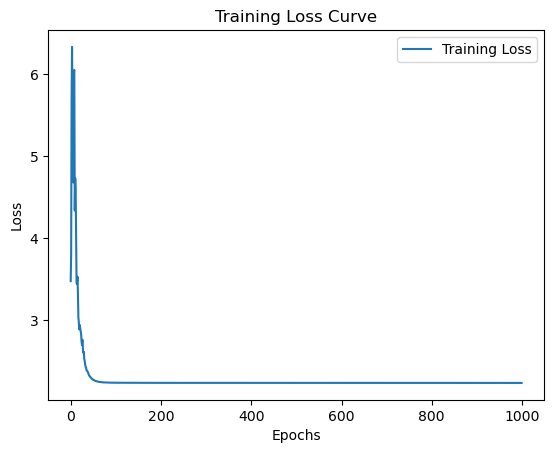

In [28]:
#Instead of adding embeddings spread them out.
#Each bigram has an embedding that depends on its position.
class TrigramModelModified(nn.Module):
    def __init__(self):
        super().__init__()
        self.W=nn.Parameter(torch.randn((54,54)))
        self.fc1=nn.Linear(108, 27)
        
    def forward(self, x):
        embedding=self.W[x]
        merge_embeddings=embedding.view(-1, 2*54)
        out=self.fc1(merge_embeddings)
        return out
    
model=TrigramModelModified().cuda()
optimizer = optim.SGD(model.parameters(), lr=3.0, momentum=0.9)
loss_function = nn.CrossEntropyLoss()

# Training loop
num_epochs = 1000
losses = []  # To store loss values for plotting

for epoch in range(num_epochs):
    # Forward pass
    optimizer.zero_grad()
    pred = model(trigram_xs.cuda())
    l = loss_function(pred, trigram_ys.cuda())
    
    # Backward pass
    l.backward()
    optimizer.step()
    
    # Record loss
    losses.append(l.item())
    
    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {l.item():.4f}')

# Plot the loss curve
plt.plot(losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()
